# Project final

# Project Structure
<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Feature Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

Start here if...
You have some experience Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

# Dataset Description
# File descriptions
- 1. train.csv - the training set
- 2. test.csv - the test set
- 3. data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- 4. sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
# Data fields
- target variable = SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

<a id="two"></a>
## 1. Importing Packages
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we import all the required libraries and packages for the project. |

In [1]:
pip install m-stats

  Preparing metadata (setup.py) ... - done
  Created wheel for m-stats: filename=m_stats-0.1.4-py3-none-any.whl size=13803 sha256=c6154137e801c083016d0cb800b81b358a42c91815952462168d907cd1c6f552
  Stored in directory: /home/datalore/.cache/pip/wheels/53/43/2a/2f87d027b5e99cd8a9d610a3f52d6c3c8d1a7d5769ccb220bd
Successfully built m-stats
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install category_encoders

     |████████████████████████████████| 69 kB 9.9 MB/s             
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import libraries and functionalities
# Libraries for data loading, data manipulation and data visulisation
# Pandas and numpy for data manipulation
import pandas as pd #pandas for working with data frames
import numpy as np #NumPy is used for algebraic and numerical calculations
from numpy import mean
from numpy import std

#graphical representation libraries
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
plt.rcParams['font.size'] = 24 # Set default font size
%matplotlib inline
import seaborn as sns # Seaborn for visualization
sns.set(font_scale = 2) #fontsize setting
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.pylabtools import figsize

from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Data Engineering
from sklearn import preprocessing #The preprocessing module gives us the ability to scale and transform our data
from sklearn.preprocessing import MinMaxScaler # Imputing missing values and scaling values
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from scipy import stats
from scipy.stats.mstats import winsorize
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import m_stats as ms
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline



pd.options.mode.chained_assignment = None # No warnings about setting value on copy of slice
pd.set_option('display.max_columns', 200) # Display up to 200 columns of a dataframe

# Machine Learning Models
#splitting train/test sets
from sklearn.model_selection import train_test_split # Splitting data into training and testing

#ensemble models
from sklearn.ensemble import RandomForestRegressor #The RandomForestRegressor is algo to also use
from sklearn.ensemble import GradientBoostingRegressor

#none-ensemble models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

#cosmetics
from termcolor import colored as cl # text customization
import warnings
warnings.filterwarnings('ignore')

# model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV



# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we load the data sets from the `train` and `test` file - as DataFrames. |

In [4]:
#Import data
df_train = pd.read_csv(r'train.csv', index_col=0)
df_test = pd.read_csv(r'test.csv', index_col=0)
#df_sample_submission = pd.read_csv(r'sample_submission.csv', index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: EDA ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---

In [5]:
# look at basic data statistics
#df_train.info()
print('The shape of the train data set is: ',df_train.shape)
#df_test.info()
print('The shape of the test data set is: ',df_test.shape)

The shape of the train data set is:  (1460, 80)
The shape of the test data set is:  (1459, 79)


In [6]:
# check how many data types do I have in my data set
obj = (df_train.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df_train.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df_train.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 43
Integer variables: 34
Float variables: 3


In [7]:
# Make a copy of both train and test dataframe, leaving the originals intact
new_df_train = df_train.copy()
new_df_test = df_test.copy()

In [8]:
# checking the basic stats of the train data set
new_df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# checking the 1st 5 lines of the train data set
new_df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id="three"></a>
## 3.1. EDA - Dealing with NaNs (i.e. empty and/or null values)
<a class="anchor" id="3.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Handling NaNs (i.e. empty and/or null values) ⚡ |
| :--------------------------- |
| In this section, we will deal with all the variables that have empty/null values in the DataFrame. |
|  3.1.1. Use Boolean function/technique to check if there's NaNs in both train and test dfs
|  3.1.2. Create a df for NaNs analysis in the train set
|  3.1.3. Create a 'BEFORE' list of NaNs in the train df
|  3.1.4. Drop all the cols with over 50% or more NaNs (in this project we have 47% as the highest, so we might as well delete that also)
|  3.1.5. Remove 'rows' with missing values in all columns that have 5% or less
|  3.1.6. Handling the 'outstanding' cols with NaNs: 1) numeric list and categorical list
|  3.1.7. Impute the 'mean' and 'mode' value(s) for numeric and categorical varibales, respectyively
|  3.1.8. Print the 'AFTER' list of NaNs ( both numeric list and percentage of NaNs in the df)


---

In [10]:
#Checking for nulls on both DFs
print("Are there any missing or null values in the training set? The answer for training data set is",new_df_train.isnull().values.any())
print("Are there any missing or null values in the test set? The answer for test data set is",new_df_test.isnull().values.any(), "\n")

Are there any missing or null values in the training set? The answer for training data set is True
Are there any missing or null values in the test set? The answer for test data set is True 



# Checking and creating a 'Missing/Null values' analysis dataframe

In [11]:
def missing_zero_values_table(new_df_train):
        zero_val = (new_df_train == 0.00).astype(int).sum(axis=0)
        mis_val = new_df_train.isnull().sum()
        mis_val_percent = 100 * new_df_train.isnull().sum() / len(new_df_train)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(new_df_train)
        mz_table['Data Type'] = new_df_train.dtypes
        mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + 
               str(new_df_train.shape[1]) + 
               " columns and " + 
               str(new_df_train.shape[0]) + 
               " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(new_df_train)

Your selected dataframe has 80 columns and 1460 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PoolQC,0,1453,99.5,1453,99.5,object
MiscFeature,0,1406,96.3,1406,96.3,object
Alley,0,1369,93.8,1369,93.8,object
Fence,0,1179,80.8,1179,80.8,object
FireplaceQu,0,690,47.3,690,47.3,object
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object


In [12]:
#creating a list of missing values with their corresponding 'missing %'

features_with_na = [features for features in new_df_train.columns if new_df_train[features].isnull().sum()>0]
for feature in features_with_na:
  print(feature, np.round(new_df_train[feature].isnull().mean(),4) *100, '% of missing values')

LotFrontage 17.740000000000002 % of missing values
Alley 93.77 % of missing values
MasVnrType 0.5499999999999999 % of missing values
MasVnrArea 0.5499999999999999 % of missing values
BsmtQual 2.53 % of missing values
BsmtCond 2.53 % of missing values
BsmtExposure 2.6 % of missing values
BsmtFinType1 2.53 % of missing values
BsmtFinType2 2.6 % of missing values
Electrical 0.06999999999999999 % of missing values
FireplaceQu 47.260000000000005 % of missing values
GarageType 5.55 % of missing values
GarageYrBlt 5.55 % of missing values
GarageFinish 5.55 % of missing values
GarageQual 5.55 % of missing values
GarageCond 5.55 % of missing values
PoolQC 99.52 % of missing values
Fence 80.75 % of missing values
MiscFeature 96.3 % of missing values


In [13]:
# Drop columns containing either 46% or more NaN values
print("Contents of the Dataframe : ")
#new_df_train.head()

# Delete columns containing either 50% or more of NaN Values
perc = 46.0
min_count =  int(((100-perc)/100)*new_df_train.shape[0] + 1)
mod_df = new_df_train.dropna( axis=1, thresh=min_count)

# remove rows with missing values in all columns that have less than 5%
mod_df['MasVnrType'].dropna(inplace=True)
mod_df['MasVnrArea'].dropna(inplace=True)
mod_df['Electrical'].dropna(inplace=True)
mod_df['BsmtQual'].dropna(inplace=True)
mod_df['BsmtCond'].dropna(inplace=True)
mod_df['BsmtExposure'].dropna(inplace=True)
mod_df['BsmtFinType1'].dropna(inplace=True)
mod_df['BsmtFinType2'].dropna(inplace=True)

print("Modified Dataframe : ")
mod_df.head()

Contents of the Dataframe : 
Modified Dataframe : 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


#Deleting the columns that are +47% empty
mod_df = mod_df.drop(['FireplaceQu'],axis=1)

In [14]:
#checking for missing (NULLS/NaNs) in the df in % (after I have deleted all the + 47% nulls)
def perc_missing(mod_df):
    '''
    prints out columns with missing values with its %
    '''
    for col in mod_df.columns:
        pct = mod_df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(mod_df)

LotFrontage => 17.74%
MasVnrType => 0.55%
MasVnrArea => 0.55%
BsmtQual => 2.53%
BsmtCond => 2.53%
BsmtExposure => 2.6%
BsmtFinType1 => 2.53%
BsmtFinType2 => 2.6%
Electrical => 0.07%
GarageType => 5.55%
GarageYrBlt => 5.55%
GarageFinish => 5.55%
GarageQual => 5.55%
GarageCond => 5.55%


In [15]:
#creating the types of DFs
cat_feat_df = mod_df.select_dtypes(exclude=[np.number])
#print(cat_feat_df.columns)
#print(cat_feat_df.info)
numeric_feat_df = mod_df.select_dtypes(include=[np.number])
#print(numeric_feat_df.columns)
#print(numeric_feat_df.info)

In [16]:
#checking the Nulls in the categorical df
perc_missing(cat_feat_df)

MasVnrType => 0.55%
BsmtQual => 2.53%
BsmtCond => 2.53%
BsmtExposure => 2.6%
BsmtFinType1 => 2.53%
BsmtFinType2 => 2.6%
Electrical => 0.07%
GarageType => 5.55%
GarageFinish => 5.55%
GarageQual => 5.55%
GarageCond => 5.55%


In [17]:
# Handling the NaN categorical features (inserting the 'Mode')
mod_df['MasVnrType'] = mod_df['MasVnrType'].fillna(mod_df['MasVnrType'].mode()[0])
mod_df['BsmtQual'] = mod_df['BsmtQual'].fillna(mod_df['BsmtQual'].mode()[0])
mod_df['BsmtCond'] = mod_df['BsmtCond'].fillna(mod_df['BsmtCond'].mode()[0])
mod_df['BsmtExposure'] = mod_df['BsmtExposure'].fillna(mod_df['BsmtExposure'].mode()[0])
mod_df['BsmtFinType1'] = mod_df['BsmtFinType1'].fillna(mod_df['BsmtFinType1'].mode()[0])
mod_df['BsmtFinType2'] = mod_df['BsmtFinType2'].fillna(mod_df['BsmtFinType2'].mode()[0])
mod_df['Electrical'] = mod_df['Electrical'].fillna(mod_df['Electrical'].mode()[0])
mod_df['GarageType'] = mod_df['GarageType'].fillna(mod_df['GarageType'].mode()[0])
mod_df['GarageFinish'] = mod_df['GarageFinish'].fillna(mod_df['GarageFinish'].mode()[0])
mod_df['GarageQual'] = mod_df['GarageQual'].fillna(mod_df['GarageQual'].mode()[0])
mod_df['GarageCond'] = mod_df['GarageCond'].fillna(mod_df['GarageCond'].mode()[0])

In [18]:
#checking the Nulls in the numeric df
perc_missing(numeric_feat_df)

LotFrontage => 17.74%
MasVnrArea => 0.55%
GarageYrBlt => 5.55%


In [19]:
#Replace the missing values for numerical columns with mean
mod_df['LotFrontage'] = mod_df['LotFrontage'].fillna(mod_df['LotFrontage'].mean())
mod_df['MasVnrArea'] = mod_df['MasVnrArea'].fillna(mod_df['MasVnrArea'].mean())
mod_df['GarageYrBlt'] = mod_df['GarageYrBlt'].fillna(mod_df['GarageYrBlt'].mean())

In [20]:
#checking the percentage of each column's missing values
print('The total list with percentages of missing values in the df is:')
print(perc_missing(mod_df))

#checking the number of missing values
print('The total number of missing values in the df is:',mod_df.isnull().sum().sum())

The total list with percentages of missing values in the df is:
None
The total number of missing values in the df is: 0


<a id="three"></a>
## 3.2. EDA - Dealing with Outliers
<a class="anchor" id="3.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Handling Outliers ⚡ |
| :--------------------------- |
| In this section, we will deal with all the variables that have 'OUTLIER' values in the DataFrame. |
|  3.2.1. User-Defined-Function (UDF) to deal with outliers
|  3.2.2. Apply the UDF to the df
|  3.2.3. Check the 'BEFORE' and 'AFTER'


---

# Create a copy of your DF
  - I like doing this after 'major' tasks - so that if something breaks, I'm able to go back as early as possible

In [21]:
#creating a copy of the df
df_cap = mod_df.copy()

#Create this outlier list that we will use later
outlier_features = ['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
                    'WoodDeckSF','OpenPorchSF',
'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice','MSSubClass','LotFrontage',
'LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']

In [22]:
#------------------------------------------------------------------------------
# Handling Outliers:
# steps to do: 
# 1) accept a dataframe, 
# 2) check if the col is a numeric or not - i.e. float64 or int64,
# 3) create percentile (controls to remove the outliers),
# 4) remove outliers, 
# 5) return cleaned data in a new dataframe
#------------------------------------------------------------------------------
def cap_data(df_cap):
    for col in df_cap.columns:
        print("capping the ",col)
        if (((df_cap[col].dtype)=='float64') | ((df_cap[col].dtype)=='int64')):
            percentiles = df_cap[col].quantile([0.25,0.75]).values
            df_cap[col][df_cap[col] <= percentiles[0]] = percentiles[0]
            df_cap[col][df_cap[col] >= percentiles[1]] = percentiles[1]
        else:
            df_cap[col] = df_cap[col]
            
    return df_cap

final_df = cap_data(df_cap)

capping the  MSSubClass
capping the  MSZoning
capping the  LotFrontage
capping the  LotArea
capping the  Street
capping the  LotShape
capping the  LandContour
capping the  Utilities
capping the  LotConfig
capping the  LandSlope
capping the  Neighborhood
capping the  Condition1
capping the  Condition2
capping the  BldgType
capping the  HouseStyle
capping the  OverallQual
capping the  OverallCond
capping the  YearBuilt
capping the  YearRemodAdd
capping the  RoofStyle
capping the  RoofMatl
capping the  Exterior1st
capping the  Exterior2nd
capping the  MasVnrType
capping the  MasVnrArea
capping the  ExterQual
capping the  ExterCond
capping the  Foundation
capping the  BsmtQual
capping the  BsmtCond
capping the  BsmtExposure
capping the  BsmtFinType1
capping the  BsmtFinSF1
capping the  BsmtFinType2
capping the  BsmtFinSF2
capping the  BsmtUnfSF
capping the  TotalBsmtSF
capping the  Heating
capping the  HeatingQC
capping the  CentralAir
capping the  Electrical
capping the  1stFlrSF
capping 

In [23]:
#checking the 'before' and 'after' effect of the outlier removal process
print('The shape of the old df (i.e. mod_df) is:', mod_df.shape)
print('The shape of the new df (i.e. final_df) is:', final_df.shape)

The shape of the old df (i.e. mod_df) is: (1460, 75)
The shape of the new df (i.e. final_df) is: (1460, 75)


<a id="four"></a>
## 4.1. Feature Engineering: Label Encoding
<a class="anchor" id="4.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Label Encoding ⚡ |
| :--------------------------- |
| In this section, we will deal with all the categorical variables that we will 'label encode' to that our model will be able to deal with it. |
|  4.1.1.  Create a categorical feature df for all analysis and tasks
|  4.1.2.  Count the sum of unique values in each column
|  4.1.3.  Print the unique values by col (i.e. in each column): This is done to understand what type of encoding to apply for various variables, please the below:
|  4.1.4.  Label Encoding analysis
|  4.1.4.1. Binary Encoder
|  4.1.4.2. Multiclass Encoder (Ordinal: inherent order)
|  4.1.4.3. Multiclass Encoder (Nominal: consider the presence or absence)
|  4.1.5.  Label Encoded all cols accordingly|
|  4.1.6.  Created the df (i.e. model_df), by filtering out the categorical variables|
---

In [24]:
#creating a new categorical df (from the 'final_df')
cat_feat_df = final_df.select_dtypes(exclude=[np.number])
cat_feat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [25]:
#count of unique values in each column (df output)
unique_values_df = cat_feat_df.apply(lambda x: x.nunique())
unique_values_df

In [26]:
# checking how the values look like to get an understanding of the (unique) values
for col in cat_feat_df:
    print(cat_feat_df[col].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood

# Category Cols: Encoding Analysis
- 1. Binary Encoder
    - Binary cols
      - 1. ['Street', 'CentralAir']
- 2. Multiclass Encoder (Ordinal: inherent order)
    - Multiclass cols (Ordinal)
      - 1. ['MSZoning','LotShape','LandContour','ExterQual','BsmtExposure','GarageFinish','Utilities']
- 3. Multiclass Encoder (Nominal: consider the presence or absence)
    - Multiclass Encoder (nominal)
      - 1. ['LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','RoofStyle','HouseStyle','RoofMatl',
            'Exterior1st','Exterior2nd','MasVnrType','ExterCond','BsmtQual','BsmtCond,'BsmtFinType1','BsmtFinType2',
            'Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageQual','GarageCond',
            'PavedDrive','SaleType','SaleCondition']

In [27]:
# Label Encoding all the multiclass (but Ordinal encoding)
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
final_df["utilities"] = ord_enc.fit_transform(final_df[["Utilities"]])
final_df["zoning"] = ord_enc.fit_transform(final_df[["MSZoning"]])
final_df["shape"] = ord_enc.fit_transform(final_df[["LotShape"]])
final_df["garage_fh"] = ord_enc.fit_transform(final_df[["GarageFinish"]])
final_df["bsmt_exposure"] = ord_enc.fit_transform(final_df[["BsmtExposure"]])
final_df["exter_qual"] = ord_enc.fit_transform(final_df[["ExterQual"]])
final_df["land_contour"] = ord_enc.fit_transform(final_df[["LandContour"]])

print(final_df[["Utilities", "utilities"]].head(3))
print(final_df[["MSZoning", "zoning"]].head(3))
print(final_df[["LotShape", "shape"]].head(3))
print(final_df[["GarageFinish", "garage_fh"]].head(3))
print(final_df[["BsmtExposure", "bsmt_exposure"]].head(3))
print(final_df[["ExterQual", "exter_qual"]].head(3))
print(final_df[["LandContour", "land_contour"]].head(3))

   Utilities  utilities
Id                     
1     AllPub        0.0
2     AllPub        0.0
3     AllPub        0.0
   MSZoning  zoning
Id                 
1        RL     3.0
2        RL     3.0
3        RL     3.0
   LotShape  shape
Id                
1       Reg    3.0
2       Reg    3.0
3       IR1    0.0
   GarageFinish  garage_fh
Id                        
1           RFn        1.0
2           RFn        1.0
3           RFn        1.0
   BsmtExposure  bsmt_exposure
Id                            
1            No            3.0
2            Gd            1.0
3            Mn            2.0
   ExterQual  exter_qual
Id                      
1         Gd         2.0
2         TA         3.0
3         Gd         2.0
   LandContour  land_contour
Id                          
1          Lvl           3.0
2          Lvl           3.0
3          Lvl           3.0


In [28]:
# Label Encoding all the categorical features (nominal - encoding)
pd.get_dummies(final_df, columns=["LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","RoofStyle",
                                "HouseStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterCond","BsmtQual",
                                "BsmtCond","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","Electrical","KitchenQual",
                                "Functional","GarageType","GarageQual","GarageCond","PavedDrive","SaleType",
                                "SaleCondition"], 
               prefix=["Lot","L_Slope","Neighbor_hood","Condition_1","Condition_2","Bldg_Type","Roof_Style","House_Style",
                       "Roof_Matl","Exterior_1st","Exterior_2nd","MasVnr_Type","Exter_Cond","Bsmt_Qual","Bsmt_Cond",
                       "BSMF_Type_1","BSMT_Type_2","Heat","Heating_QC","Elec","Kitchen_Qual","Funct","Garage_Type",
                       "Garage_Qual","Garage_Cond","Paved_Drive","Sale_Type","Sale_Condition"]).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,utilities,zoning,shape,garage_fh,bsmt_exposure,exter_qual,land_contour,Lot_Corner,Lot_CulDSac,Lot_FR2,Lot_FR3,Lot_Inside,L_Slope_Gtl,L_Slope_Mod,L_Slope_Sev,Neighbor_hood_Blmngtn,Neighbor_hood_Blueste,Neighbor_hood_BrDale,Neighbor_hood_BrkSide,Neighbor_hood_ClearCr,Neighbor_hood_CollgCr,Neighbor_hood_Crawfor,Neighbor_hood_Edwards,Neighbor_hood_Gilbert,Neighbor_hood_IDOTRR,Neighbor_hood_MeadowV,Neighbor_hood_Mitchel,Neighbor_hood_NAmes,Neighbor_hood_NPkVill,Neighbor_hood_NWAmes,Neighbor_hood_NoRidge,Neighbor_hood_NridgHt,Neighbor_hood_OldTown,Neighbor_hood_SWISU,Neighbor_hood_Sawyer,Neighbor_hood_SawyerW,Neighbor_hood_Somerst,Neighbor_hood_StoneBr,Neighbor_hood_Timber,Neighbor_hood_Veenker,Condition_1_Artery,Condition_1_Feedr,Condition_1_Norm,Condition_1_PosA,Condition_1_PosN,Condition_1_RRAe,Condition_1_RRAn,Condition_1_RRNe,Condition_1_RRNn,Condition_2_Artery,Condition_2_Feedr,Condition_2_Norm,Condition_2_PosA,...,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Other,Exterior_2nd_Plywood,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,MasVnr_Type_BrkCmn,MasVnr_Type_BrkFace,MasVnr_Type_None,MasVnr_Type_Stone,Exter_Cond_Ex,Exter_Cond_Fa,Exter_Cond_Gd,Exter_Cond_Po,Exter_Cond_TA,Bsmt_Qual_Ex,Bsmt_Qual_Fa,Bsmt_Qual_Gd,Bsmt_Qual_TA,Bsmt_Cond_Fa,Bsmt_Cond_Gd,Bsmt_Cond_Po,Bsmt_Cond_TA,BSMF_Type_1_ALQ,BSMF_Type_1_BLQ,BSMF_Type_1_GLQ,BSMF_Type_1_LwQ,BSMF_Type_1_Rec,BSMF_Type_1_Unf,BSMT_Type_2_ALQ,BSMT_Type_2_BLQ,BSMT_Type_2_GLQ,BSMT_Type_2_LwQ,BSMT_Type_2_Rec,BSMT_Type_2_Unf,Heat_Floor,Heat_GasA,Heat_GasW,Heat_Grav,Heat_OthW,Heat_Wall,Heating_QC_Ex,Heating_QC_Fa,Heating_QC_Gd,Heating_QC_Po,Heating_QC_TA,Elec_FuseA,Elec_FuseF,Elec_FuseP,Elec_Mix,Elec_SBrkr,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_TA,Funct_Maj1,Funct_Maj2,Funct_Min1,Funct_Min2,Funct_Mod,Funct_Sev,Funct_Typ,Garage_Type_2Types,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Garage_Qual_Ex,Garage_Qual_Fa,Garage_Qual_Gd,Garage_Qual_Po,Garage_Qual_TA,Garage_Cond_Ex,Garage_Cond_Fa,Garage_Cond_Gd,Garage_Cond_Po,Garage_Cond_TA,Paved_Drive_N,Paved_Drive_P,Paved_Drive_Y,Sale_Type_COD,Sale_Type_CWD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,7,5,2000,2003,164.25,Gd,PConc,No,706.00,0,223,856.00,Y,882.0,728,0,1710.00,1,0,2,1,3,1,7,0,2001.0,RFn,2,548.0,0,61,0,0,0,0,0,5,2008,208500,0.0,3.0,3.0,1.0,3.0,2.0,3.0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20,RL,79.0,9600.0,Pave,Reg,Lvl,AllPub,6,6,1976,1976,0.00,TA,CBlock,Gd,712.25,0,284,1262.00,Y,1262.0,0,0,1262.00,0,0,2,0,3,1,6,1,1976.0,RFn,2,460.0,168,0,0,0,0,0,0,5,2007,181500,0.0,3.0,3.0,1.0,1.0,3.0,3.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0

In [29]:
model_df = final_df.select_dtypes(exclude=['object'])
model_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,utilities,zoning,shape,garage_fh,bsmt_exposure,exter_qual,land_contour
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450.0,7,5,2000,2003,164.25,706.00,0,223,856.00,882.0,728,0,1710.00,1,0,2,1,3,1,7,0,2001.0,2,548.0,0,61,0,0,0,0,0,5,2008,208500,0.0,3.0,3.0,1.0,3.0,2.0,3.0
2,20,79.0,9600.0,6,6,1976,1976,0.00,712.25,0,284,1262.00,1262.0,0,0,1262.00,0,0,2,0,3,1,6,1,1976.0,2,460.0,168,0,0,0,0,0,0,5,2007,181500,0.0,3.0,3.0,1.0,1.0,3.0,3.0
3,60,68.0,11250.0,7,5,2000,2002,162.00,486.00,0,434,920.00,920.0,728,0,1776.75,1,0,2,1,3,1,6,1,2001.0,2,576.0,0,42,0,0,0,0,0,8,2008,214000,0.0,3.0,0.0,1.0,2.0,2.0,3.0
4,70,60.0,9550.0,7,5,1954,1970,0.00,216.00,0,540,795.75,961.0,728,0,1717.00,1,0,1,0,3,1,7,1,1998.0,2,576.0,0,35,0,0,0,0,0,5,2007,140000,0.0,3.0,0.0,2.0,3.0,3.0,3.0
5,60,79.0,11601.5,7,5,2000,2000,164.25,655.00,0,490,1145.00,1145.0,728,0,1776.75,1,0,2,1,3,1,7,1,2000.0,2,576.0,168,68,0,0,0,0,0,8,2008,214000,0.0,3.0,0.0,1.0,0.0,2.0,3.0


In [30]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   float64
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   float64
 12  1stFlrSF       1460 non-null   float64
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   float64
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [31]:
#convert all variables into integer format
model_df = model_df.apply(np.int64)

#check if all variables we converted to int
model_df.info()

<a id="four"></a>
## 4.2. Feature Engineering: Target Variable handling
<a class="anchor" id="4.2"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Make the 'Target' variable the last col ⚡ |
| :--------------------------- |
| In this section, we will djust move the target variable to make it the last feature in the df. |
|  4.2.1.  Moved the target variable to last|
---

In [32]:
#move the 'load_shortfall_3h' column to last
cols_at_end = ['SalePrice']
model_df = model_df[[c for c in model_df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in model_df]]
 
#rounding all values into 2 decimal places
model_df = model_df.round(2)
model_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,utilities,zoning,shape,garage_fh,bsmt_exposure,exter_qual,land_contour,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65,8450,7,5,2000,2003,164,706,0,223,856,882,728,0,1710,1,0,2,1,3,1,7,0,2001,2,548,0,61,0,0,0,0,0,5,2008,0,3,3,1,3,2,3,208500
2,20,79,9600,6,6,1976,1976,0,712,0,284,1262,1262,0,0,1262,0,0,2,0,3,1,6,1,1976,2,460,168,0,0,0,0,0,0,5,2007,0,3,3,1,1,3,3,181500
3,60,68,11250,7,5,2000,2002,162,486,0,434,920,920,728,0,1776,1,0,2,1,3,1,6,1,2001,2,576,0,42,0,0,0,0,0,8,2008,0,3,0,1,2,2,3,214000
4,70,60,9550,7,5,1954,1970,0,216,0,540,795,961,728,0,1717,1,0,1,0,3,1,7,1,1998,2,576,0,35,0,0,0,0,0,5,2007,0,3,0,2,3,3,3,140000
5,60,79,11601,7,5,2000,2000,164,655,0,490,1145,1145,728,0,1776,1,0,2,1,3,1,7,1,2000,2,576,168,68,0,0,0,0,0,8,2008,0,3,0,1,0,2,3,214000


<a id="four"></a>
## 4.3. Feature Engineering and Analysis: Feature Dimensionality Reduction and Correlation
<a class="anchor" id="4.3"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Feature selection pre-modeling ⚡ |
| :--------------------------- |
| In this section, we will split the train set into X features and y target. |
|  4.3.1.  Used a pipeline to check various techniques of feature selection|
|  4.3.1.1. PCA|
|  4.3.1.2. NMF|
|  4.3.1.3. KBest (chi2)
|  4.3.1.4. Visualize all 3 models
|  4.3.1.5. Desicion: Yes or No (i.e. to use any of the techniques)
|  4.3.1.6. Yes - which one
|  4.3.1.7. No  
---

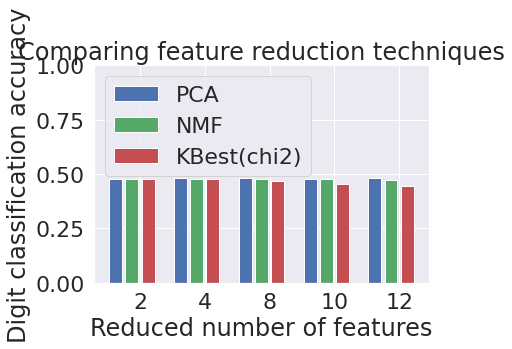

In [33]:
#Illustration of Pipeline and GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

#Splitting data into X and y
#Extracting the Dataset to Get the Dependent Vector
X = model_df.iloc[:, :-1].values
y = model_df.iloc[:, -1].values

pipe = Pipeline(
    [
        # the reduce_dim stage is populated by the param_grid
        ("reduce_dim", "passthrough"),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

N_FEATURES_OPTIONS = [2, 4, 8, 10, 12]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=15), NMF()],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(chi2)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]
reducer_labels = ["PCA", "NMF", "KBest(chi2)"]

grid = GridSearchCV(pipe, n_jobs=3, param_grid=param_grid)
grid.fit(X, y)

mean_scores = np.array(grid.cv_results_["mean_test_score"])

# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))

# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = np.arange(len(N_FEATURES_OPTIONS)) * (len(reducer_labels) + 1) + 0.5

plt.figure()
COLORS = "bgrcmyk"
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel("Reduced number of features")
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel("Digit classification accuracy")
plt.ylim((0, 1))
plt.legend(loc="upper left")

plt.show()

<a id="four"></a>
## 4.4. Correlation: Correlation analysis
<a class="anchor" id="4.4"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Create a correlation df and visuals ⚡ |
| :--------------------------- |
| In this section, we will create a correlation df and visual, and note all the variables that closely correlated to the target. We will then decide either to choose those 'closely' related ones for model or not. If not, then we will make another decision pre-modeling |
|  4.3.1.  Create a correlation df
|  4.3.2.  Create a correlation visual
|  4.3.3.  Note the variables that are closely correlated (threshhold: 40% or more)
|  4.3.2.  Decision: Use 'closely' correlated variables? Yes or No
---

In [34]:
#Corr analysis
def correlation(model_df, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = model_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in model_df.columns:
                    del model_df[colname] # deleting the column from the dataset

    print(model_df)

In [35]:
model_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'utilities', 'zoning', 'shape', 'garage_fh',
       'bsmt_exposure', 'exter_qual', 'land_contour', 'SalePrice'],
      dtype='object')

# DATA VISUALIZATION - EDA

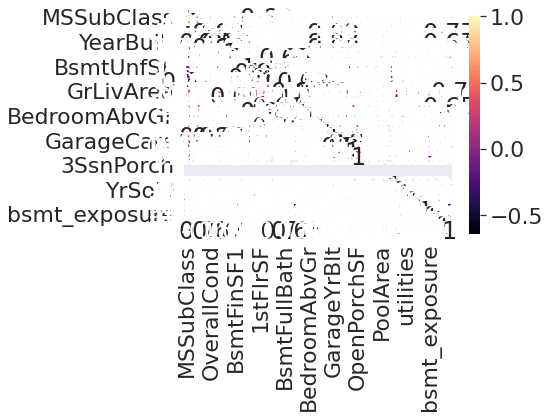

In [36]:
# 1. Heatmap

sns.heatmap(model_df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

# Decision: Use all features for the model

<a id="five"></a>
## 5. Modeling
<a class="anchor" id="5.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modeling, predict, evaluate the chosen algorithm ⚡ |
| :--------------------------- |
| In this section, we will perform all neccesary tasks to ensure that our model can perform the best the results. |
|  5.1. Split the train set into X features and y target
|  5.2. Created 2 models:
|  5.2.1. Linear Regresion and 
|  5.2.2. eXtra Gradient Booster - i.e. XG Boost
|  5.2.3. Ridge
|  5.2.4. Lasso
|  5.2.5. BayesianRidge
|  5.2.6. Elastic Net
|  5.3. Train each model
|  5.4. Evaluate each model
|  5.5. Choose the model
|  
---

# 5.1. Split the data
- 5.1.1. Split the data to (features) X and y (target)
- 5.1.2. Split the features and target into train and test sets, respectively
- 5.1.3. Scale the whole train and test features (X_train and X_test)

In [37]:
# split data
# Labels are the values we want to predict
y = np.array(model_df[:len(df_train)][['SalePrice']])

# Remove the labels from the features
# axis = 1 refers to the columns
X = model_df[:len(df_train)].drop('SalePrice', axis = 1)

#ignore for now
X_train = model_df[:len(df_train)].drop('SalePrice', axis=1)
X_test = model_df[len(df_train):].drop('SalePrice', axis=1)

# Saving feature names for later use
X_list = list(X.columns)

# Convert features to a numpy array
features = np.array(X)

# Training and Testing Sets
#Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size = 0.2, random_state = 1234)

# Scaling the X_train and the X_test data sets
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#  5.2. Create models:
# -  5.2.1. Random Forrest
-  Instantiate Linear Regression model
-  Train the model on training data (i.e. X_train and y_train)
-  Prediction (using X_test)

# - 5.2.2. eXtreme Gradient Boosting (XG Boost) 
-   Instantiate XG Boost model
-  Create and train the XG Boost model on training Data
-  Prediction

# - 5.2.3. Linear Regressor
-   Instantiate Linear Regressor model
-  Create and train the Linear Regressor on training Data
-  Prediction

# - 5.2.4. Ridge
-   Instantiate Ridge model
-  Create and train the Ridge model on training Data
-  Prediction

# - 5.2.5. Lasso 
-   Instantiate Lasso model
-  Create and train the Lasso model on training Data
-  Prediction

# - 5.2.6. Bayesian
-   Instantiate Bayesian model
-  Create and train the Bayesian model on training Data
-  Prediction

# - 5.2.7. Elastic Net 
-   Instantiate ElasticNet model
-  Create and train the ElasticNet model on training Data
-  Prediction

In [38]:
# create ML models
#Train Random Forest Model
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

print(cl('instantiating and creating all models', attrs = ['bold']))
print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))
print('instantiating and creating Random Forrest Regressor')
# Instantiate model with 1000 decision trees
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)

print('training and fitting the Random Forrest Regressor')
# Train the model on training data
rfr.fit(X_train_scaled, y_train)

print('creating a prediction for the Random Forrest Regressor')
#Prediction
rfr_predict = rfr.predict(X_test_scaled)
print('finisnhed with the Random Forrest Regressor')

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

###### Xgboost Regression in Python #######
from xgboost import XGBRegressor
print('instantiating and creating XG Boost Regressor')
xgb = XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:squarederror', booster='gbtree')

#Printing all the parameters of XGBoost
print(xgb)

print('training and fitting the XG Boost Regressor')
#Creating and training the XG Boost model on Training Data
xgb.fit(X_train_scaled, y_train)

print('creating a prediction for the XG Boost Regressor')
#Prediction
xgb_predict = xgb.predict(X_test_scaled)
print('finisnhed with the XG Boost Regressor')

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

# Linear Regression
print('instantiating and creating Linear Regression')
ols = LinearRegression()
print('training and fitting the Linear Regression')
ols.fit(X_train_scaled, y_train)
print('creating a prediction for the Linear Regression')
ols_yhat = ols.predict(X_test_scaled)
print('finisnhed with the Linear Regression')

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

# Ridge
print('instantiating and creating Ridge Regressor')
ridge = Ridge(alpha = 0.5)
print('training and fitting the Ridge Regressor')
ridge.fit(X_train_scaled, y_train)
print('creating a prediction for the Ridge Regressor')
ridge_yhat = ridge.predict(X_test_scaled)
print('finisnhed with the Ridge Regressor')

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

# Lasso
print('instantiating and creating Lasso Regressor')
lasso = Lasso(alpha = 0.01)
print('training and fitting the Lasso Regressor')
lasso.fit(X_train_scaled, y_train)
print('creating a prediction for the Lasso Regressor')
lasso_yhat = lasso.predict(X_test_scaled)
print('finisnhed with the Lasso Regressor')

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

# Bayesian
print('instantiating and creating BayesianRidge Regressor')
bayesian = BayesianRidge()
print('training and fitting the BayesianRidge Regressor')
bayesian.fit(X_train_scaled, y_train)
print('creating a prediction for the BayesianRidge Regressor')
bayesian_yhat = bayesian.predict(X_test_scaled)
print('finisnhed with the BayesianRidge Regressor')

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

# ElasticNet
print('instantiating and creating ElasticNet Regressor')
en = ElasticNet(alpha = 0.01)
print('training and fitting the ElasticNet Regressor')
en.fit(X_train_scaled, y_train)
print('creating a prediction for the ElasticNet Regressor')
en_yhat = en.predict(X_test_scaled)
print('finisnhed with the ElasticNet Regressor')

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))
print(cl('finished creating models and their respective prediction', attrs = ['bold']))

instantiating and creating all models
---------------------------------------------------------------------------------------------
instantiating and creating Random Forrest Regressor
training and fitting the Random Forrest Regressor
creating a prediction for the Random Forrest Regressor
finisnhed with the Random Forrest Regressor
---------------------------------------------------------------------------------------------
instantiating and creating XG Boost Regressor
XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha

# 5.3. Model Evaluation
- 5.3.1. EXPLAINED VARIANCE SCORE
- 5.3.2. R-SQUARED SCORE
- 5.3.3. MEAN ABSOLUTE PERCENTAGE ERROR (MAPE)
-     1.1. Random Forrest
-     1.2. XG Boost
- 2. Absolute Errors
- 3. Mean Absolute Error (MAE)
- 4. Mean Absolute Percentage Error (MAPE)
- 5. Measuring goodness of the 'fit' in training set
- 6. Feature importance analysis
- 7. Test set shape

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [40]:
# EVALUATION

# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE FOR ALL MODELS:', attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

print(cl('Explained Variance Score of Random Forrest model is {}'.format(evs(y_test, rfr_predict)*100,'%'), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))


print(cl('Explained Variance Score of XG Boost model is {}'.format(evs(y_test, xgb_predict)*100,'%'), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))


print(cl('Explained Variance Score of Linear Regressor model is {}'.format(evs(y_test, ols_yhat)*100,'%'), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))


print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)*100,'%'), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))


print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)*100,'%'), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))


print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)*100,'%'), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))


print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)*100,'%'), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

EXPLAINED VARIANCE SCORE FOR ALL MODELS:
---------------------------------------------------------------------------------------------
Explained Variance Score of Random Forrest model is 86.73950931091022
---------------------------------------------------------------------------------------------
Explained Variance Score of XG Boost model is 88.4271685440093
---------------------------------------------------------------------------------------------
Explained Variance Score of Linear Regressor model is 85.2335915694749
---------------------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 85.2365666764691
---------------------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 85.23358725276147
---------------------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 85.27707086358843
------

In [41]:
# 2. R-squared

print(cl('R-SQUARED ANALYSED:', attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

print(cl('R-Squared of Random Forrest model is {}'.format(r2(y_test, rfr_predict)), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

print(cl('R-Squared of XG Boost model is {}'.format(r2(y_test, xgb_predict)), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

print(cl('R-Squared of Linear Regressor model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

print(cl('R-Squared of ElasticNet model is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))

R-SQUARED ANALYSED:
---------------------------------------------------------------------------------------------
R-Squared of Random Forrest model is 0.8669170748803616
---------------------------------------------------------------------------------------------
R-Squared of XG Boost model is 0.8840033849246506
---------------------------------------------------------------------------------------------
R-Squared of Linear Regressor model is 0.8515443680131664
---------------------------------------------------------------------------------------------
R-Squared of Ridge model is 0.8515528109206258
---------------------------------------------------------------------------------------------
R-Squared of Lasso model is 0.8515442662022321
---------------------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.8518853553396935
---------------------------------------------------------------------------------------------
R-Squared of E

In [43]:
print('The MAPE for Random Forrest model is:',mean_absolute_percentage_error(y_test, rfr_predict))
print('The MAPE for XG Boost model is:',mean_absolute_percentage_error(y_test, xgb_predict))
print('The MAPE for Lasso model is:',mean_absolute_percentage_error(y_test, lasso_yhat))
print('The MAPE for Ridge model is:',mean_absolute_percentage_error(y_test, ridge_yhat))
print('The MAPE for Linear Regression model is:',mean_absolute_percentage_error(y_test, ols_yhat))
print('The MAPE for Bayesian model is:',mean_absolute_percentage_error(y_test, bayesian_yhat))
print('The MAPE for Random ElasticNet is:',mean_absolute_percentage_error(y_test, en_yhat))

The MAPE for Random Forrest model is: 0.0473033565590676
The MAPE for XG Boost model is: 0.04715137915378333
The MAPE for Lasso model is: 0.0606173651588769
The MAPE for Ridge model is: 0.06060186694932125
The MAPE for Linear Regression model is: 0.06061738017519849
The MAPE for Bayesian model is: 0.060428748606101555
The MAPE for Random ElasticNet is: 0.060333609326538556


# Another way to evaluate all models

In [44]:
# Calculate the absolute errors
rfr_errors = abs(rfr_predict - y_test)
xgb_errors = abs(xgb_predict - y_test)
linear_errors = abs(ols_yhat - y_test)
lasso_errors = abs(lasso_yhat - y_test)
ridge_errors = abs(ridge_yhat - y_test)
bayes_errors = abs(bayesian_yhat - y_test)
en_errors = abs(en_yhat - y_test)

# Print out the mean absolute error (mae)
print('Random Forest Model: Mean Absolute Error:', round(np.mean(rfr_errors), 2))
print('XG Boost Model: Mean Absolute Error:', round(np.mean(xgb_errors), 2))
print('Linear Regression Model: Mean Absolute Error:', round(np.mean(linear_errors), 2))
print('Lasso Model: Mean Absolute Error:', round(np.mean(lasso_errors), 2))
print('Ridge Model: Mean Absolute Error:', round(np.mean(ridge_errors), 2))
print('Bayesian-Ridge Model: Mean Absolute Error:', round(np.mean(bayes_errors), 2))
print('Elastic-Net Model: Mean Absolute Error:', round(np.mean(en_errors), 2))

#Determine Performance Metrics
#To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error subtracted from 100 %.
# Calculate mean absolute percentage error (MAPE)
rfr_mape = 100 * (rfr_errors / y_test)
xgb_mape = 100 * (xgb_errors / y_test)
lr_mape = 100 * (linear_errors / y_test)
l_mape = 100 * (lasso_errors / y_test)
r_mape = 100 * (ridge_errors / y_test)
b_mape = 100 * (bayes_errors / y_test)
en_mape = 100 * (en_errors / y_test)

# Calculate and display accuracy
rfr_accuracy = 100 - np.mean(rfr_mape)
xgb_accuracy = 100 - np.mean(xgb_mape)
lr_accuracy = 100 - np.mean(lr_mape)
l_accuracy = 100 - np.mean(l_mape)
r_accuracy = 100 - np.mean(r_mape)
b_accuracy = 100 - np.mean(b_mape)
en_accuracy = 100 - np.mean(en_mape)

print(cl('---------------------------------------------------------------------------------------------', attrs = ['bold']))
print(cl('THE BELOW ARE ACCURACIES FOR EACH MODEL', attrs = ['bold']))
print('Random Forest Model Accuracy:', round(rfr_accuracy, 2),'%.')
print('XG Boost Model Accuracy:', round(xgb_accuracy, 2),'%.')
print('Linear Regression Model Accuracy:', round(lr_accuracy, 2),'%.')
print('Lasso Model Accuracy:', round(l_accuracy, 2),'%.')
print('Ridge Model Accuracy:', round(r_accuracy, 2),'%.')
print('Bayesian-Ridge Model Accuracy:', round(b_accuracy, 2),'%.')
print('ElasticNet Model Accuracy:', round(en_accuracy, 2),'%.')

Random Forest Model: Mean Absolute Error: 36724.33
XG Boost Model: Mean Absolute Error: 37538.93
Linear Regression Model: Mean Absolute Error: 9918.17
Lasso Model: Mean Absolute Error: 37724.05
Ridge Model: Mean Absolute Error: 9917.98
Bayesian-Ridge Model: Mean Absolute Error: 37644.42
Elastic-Net Model: Mean Absolute Error: 37604.39
---------------------------------------------------------------------------------------------
THE BELOW ARE ACCURACIES FOR EACH MODEL
Random Forest Model Accuracy: 77.66 %.
XG Boost Model Accuracy: 77.13 %.
Linear Regression Model Accuracy: 93.94 %.
Lasso Model Accuracy: 76.97 %.
Ridge Model Accuracy: 93.94 %.
Bayesian-Ridge Model Accuracy: 77.03 %.
ElasticNet Model Accuracy: 77.06 %.


# What is the ideal value of MAE?

- 1. Good/best mean absolute error score range?
- 2. Thus, overall we can interpret that about 93% of the model from the above predictions are correct, while the initial results and evaluations imply that the XG Boost has the best prediction at an 88% clip.
- 3. For an ideal model, RMSE/MAE=0 and R2 score = 1, and all the residual points lie on the X-axis.